# Recognizing one 7 segment display digit
### input are values of 7 segments of the digital display. Output is a binary representation of the number shown.
![7 segment display to binary](7 to BCD.png "task at hand")

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
import keras.callbacks as cb
from keras.layers.normalization import BatchNormalization
from IPython.display import SVG

Using TensorFlow backend.


input and output data

In [2]:
zer = [1,1,1,1,1,1,0]
one = [0,1,1,0,0,0,0]
two = [1,1,0,1,1,0,1]
thr = [1,1,1,1,0,0,1]
fou = [0,1,1,0,0,1,1]
fiv = [1,0,1,1,0,1,1]
six = [1,0,1,1,1,1,1]
sev = [1,1,1,0,0,0,0]
eig = [1,1,1,1,1,1,1]
nin = [1,1,1,1,0,1,1]
eij = [1,1,1,0,1,1,1] #A
bee = [0,0,1,1,1,1,1] #b
see = [1,0,0,1,1,1,0] #C
dee = [0,1,1,1,1,0,1] #d
eee = [1,0,0,1,1,1,1] #E
eff = [1,0,0,0,1,1,1] #F
inp=[zer, one, two, thr, fou, fiv, six, sev, eig, nin, eij, bee, see, dee, eee, eff]
out=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]]

X_df=pd.DataFrame(inp,columns=['l1','l2','l3','l4','l5','l6','l7'])
X_df
Y_df=pd.DataFrame(out,columns=['b0','b1','b2','b3'])
Y_df
print(X_df.shape, Y_df.shape)
X=X_df.values
Y=Y_df.values

(16, 7) (16, 4)


#### NN model

In [3]:
class EarlyStop(cb.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # print(logs)
        
        if logs['binary_accuracy']>0.99:
            print("B_A early stop at epoch: ",  epoch)
            self.model.stop_training = True

callbacks = [
    EarlyStop(),
]



In [28]:
from keras import backend as K

def my_loss(y_true, y_pred):
    return K.sum(K.square(y_pred-y_true))

model = Sequential()
L1=Dense( units=7, input_shape=(7,), activation='relu')
model.add(L1)
L2=Dense(units=4, activation='sigmoid') 
model.add(L2)


#my_sgd = optimizers.SGD(lr=0.01, momentum=0.5, decay=0.01, nesterov=True)

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=['accuracy','binary_accuracy','mae'] )

# activations - relu, tanh, sigmoid, softmax
# optimizers - adam, rmsprop, sgd, my_sgd, adagrad
# loss functions - mse,  categorical_crossentropy, hinge, binary_crossentropy, vector_mse


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 32        
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


B_A early stop at epoch:  4445


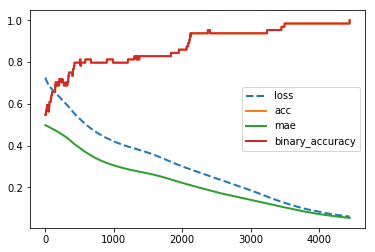

['0.13', '0.00', '0.00', '0.01'] [0, 0, 0, 0] [0, 0, 0, 0] Yay!
['0.00', '0.10', '0.00', '1.00'] [0, 0, 0, 1] [0, 0, 0, 1] Yay!
['0.03', '0.04', '1.00', '0.00'] [0, 0, 1, 0] [0, 0, 1, 0] Yay!
['0.00', '0.01', '0.96', '1.00'] [0, 0, 1, 1] [0, 0, 1, 1] Yay!
['0.14', '0.50', '0.34', '0.12'] [0, 1, 0, 0] [0, 1, 0, 0] Yay!
['0.05', '1.00', '0.05', '1.00'] [0, 1, 0, 1] [0, 1, 0, 1] Yay!
['0.14', '0.93', '1.00', '0.06'] [0, 1, 1, 0] [0, 1, 1, 0] Yay!
['0.03', '0.96', '0.84', '0.90'] [0, 1, 1, 1] [0, 1, 1, 1] Yay!
['0.96', '0.00', '0.02', '0.00'] [1, 0, 0, 0] [1, 0, 0, 0] Yay!
['0.85', '0.07', '0.00', '0.95'] [1, 0, 0, 1] [1, 0, 0, 1] Yay!
['0.96', '0.17', '0.95', '0.00'] [1, 0, 1, 0] [1, 0, 1, 0] Yay!
['0.94', '0.10', '0.95', '0.98'] [1, 0, 1, 1] [1, 0, 1, 1] Yay!
['1.00', '0.96', '0.00', '0.03'] [1, 1, 0, 0] [1, 1, 0, 0] Yay!
['1.00', '0.92', '0.04', '1.00'] [1, 1, 0, 1] [1, 1, 0, 1] Yay!
['0.99', '1.00', '0.97', '0.01'] [1, 1, 1, 0] [1, 1, 1, 0] Yay!
['0.88', '1.00', '0.97', '0.92'] [1, 1, 

In [29]:
epochs=10000
hist = model.fit(X, Y, epochs=epochs,  verbose=0, shuffle=True, callbacks=callbacks)#,batch_size=8)

epochs_done=len(hist.history['acc'])
x = np.linspace(0,epochs_done-1,epochs_done)
plt.plot(x, hist.history['loss'], '--', linewidth=2, label='loss')
plt.plot(x, hist.history['acc'], '-', linewidth=2, label='acc')
plt.plot(x, hist.history['mean_absolute_error'], '-', linewidth=2, label='mae')
plt.plot(x, hist.history['binary_accuracy'], '-', linewidth=2, label='binary_accuracy')
plt.legend()
plt.show()

pred = model.predict(inp)
for co,i in enumerate(pred):
    c=[]
    for j in i:
        if j>0.5: c.append(1)
        else: c.append(0)
    if c==out[co]: 
        st="Yay!"
    else:
        st="Nay"
    print(["{0:0.2f}".format(n) for n in i], c, out[co], st)